In [53]:
import sys
import os
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from selenium import webdriver
import time
import tqdm
from tqdm.notebook import tqdm

import hangul
import unicodedata

## 스테이크 크롤링

In [50]:
driver = webdriver.Chrome('../../driver/chromedriver.exe')
driver.get('https://search.shopping.naver.com/catalog/15064293657?query=%ED%94%84%EB%A0%88%EC%8B%9C%EC%A7%80&NaPm=ct%3Dkj828260%7Cci%3D2f87b50ef5b8a1e95b68748ce0f02eda1aa21c79%7Ctr%3Dslsl%7Csn%3D95694%7Chk%3D29b8b0b679507d34cab0ac78f217f4f5d0e927c2')
time.sleep(2)

In [51]:
#쇼핑몰리뷰 클릭
driver.find_element_by_css_selector('#snb > ul > li:nth-child(2) > a').click()

In [52]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [53]:
#1~10페이지
result = []

for i in range(1,11):
    for j in range(20):
        content = soup.select('p.reviewItems_text__XIsTc')[j].text
        content = unicodedata.normalize('NFC', content)
        result.append(content)
        
    page = '#section_review > div.pagination_pagination__2M9a4 > a:nth-child('+ str(i) +')'
    next_page = driver.find_element_by_css_selector(page).click()
    time.sleep(1)

In [54]:
#11~30페이지까지
result2_raw = [] #크롤링 결과값 넣어줄 리스트 초기화
result2 = [] #결과값 텍스트로 변환해 넣어줄 리스트 초기화

for k in range(50): # 10단위로 페이지를 몇번 넘겨줄것인지
    for j in range(4,14): #페이지를 넘기기전에 11~20까지 한페이지씩 넘어가주는 for문
        for n in range(1,21): #리뷰가 한 페이지에 20개라 1부터 21미만까지 for문
            result2_raw = '#section_review > ul > li:nth-child('+str(n)+') > div.reviewItems_review__1eF8A > div > p'
            result2_raw = driver.find_element_by_css_selector(result2_raw)
            result2.append(result2_raw.text)
            
        if(j%13==0): 
            page = '#section_review > div.pagination_pagination__2M9a4 > a.pagination_next__3ycRH'
            
        else: 
            page = '#section_review > div.pagination_pagination__2M9a4 > a:nth-child('+str(j)+')'
            
        right = driver.find_element_by_css_selector(page)
        right.click()
        time.sleep(1)

In [55]:
len(result)

200

In [56]:
len(result2)

10000

In [57]:
result_df1 = pd.DataFrame(result)
result_df1.columns = ['content']
result_df2 = pd.DataFrame(result2)
result_df2.columns = ['content']

In [59]:
steak_df = pd.concat([result_df1, result_df2])
steak_df.drop_duplicates(subset='content', inplace=True)
steak_df.reset_index(inplace=True, drop=True)
steak_df.tail()

content
9957  양도 가격도 다만족이예요\n맛있어요
9958   먹기전인데 외관은 깔끔하고 좋네요
9959   맛있어요 매번 구매하는 제품입니다
9960   포장은 깔끔했지만 너무질겨요 실망
9961   감바스 여기가 젤맛나요 프레시지짱

In [60]:
steak_df.to_excel('../output/fresheasy/steak_10000.xlsx', index=False)

In [5]:
len(steak_df)

9962

## Verb&Adjective 빈도수 확인

In [6]:
from konlpy.tag import Twitter
t = Twitter()

C:\Users\yesun\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [7]:
content = '%'.join(steak_df['content'])
content

'휴일마무리로 프레시지 어떠세요?? 긴 황금연휴끝내고 어린이날 저녁준비하려니 왤케 싫은거죠?? ㅋㅋ 그럴때 프레시지만한게 없어요ㅠ 진짜 금방 뚝딱뚝딱! 짠! 완성!!!블랙라벨스테이크와 소고기샤브샤브로 휴일마무리 잘했어요~ 블랙라벨은 남편이 먹을때마다 고기맛있다며 극찬해요! 진짜 그가격맞냐고 놀라워하고요!! 증말가성비갑이에요♥♥ 마리네이드를 위한 오일과 허브솔트까지 있는걸보곤 세심하다 생각했어요ㅋㅋ 소고기샤브샤브는 매번 집에서 해먹으면 남은야채보관이 번거롭더라구요ㅠ 숙주도 양배추도 반절남아버리니 보관도 따로해야하고 소진할 다른음식도 해야하고ㅠ 근데 프레시지는 딱 해먹고 끝!!!!주부라서 먹을만큼만사서 잔반없이 다먹으면 을매나 행복하다구요ㅠ근데 매콤맛 개발해주심 안되나요??ㅋ 매콤 밀푀유나베 먹어보니 맛있었는데 밀푀유는 깻잎+배추 포개서 싸야되니 소고기샤브샤브로만 손이가네요~;;소고기샤브샤브 다먹고 칼국수사리넣어 겉절이랑 무생채까지 곁들이니 이게 휴일마지막 마무리지 싶더라구요~^^♥아직도 프레시지 안드셔보셨어요? 믿고 구매하세요! 분명 재구매하게될거에요ㅋㅋㅋ 훗!마지막으로 프레시지 시킬때마다 검정플라스틱 그릇은 버리지마세요!!엄마표놀이할때 최고에요ㅎ 베이킹소다부어놓고 물감뿌리기/드라이아이스 택배온걸로 과학놀이하기ㅎㅎ 아이랑 재밌는 시간보낼 수 있는 넓은 그릇이니 다양하게 활용해보세요~^^%네이버 브랜드데이때 저렴한가격으로 구매했어요!평소 프레시지 밀키트를 좋아해서 행사하면 자주 구매하는편인데 외식을 할 수 없는 요즘은 더욱 더 자주 구매하게 되는것같아요! 특히나, 식당이나 레스토랑에서  스테이크를 먹는 외식은  더욱 할 수 없는 시기이니만큼  블랙라벨스테이크를 자주 구매해서 먹고있습니다.언제나 100% 만족스러운 블랙라벨스테이크!이 가격에 이런 품질 스테이크라니! 매번 먹으면서 감탄하게되는 믿기지 않는 품질과 맛!그리고 저렴한가격까지! 맛있다 연발하는 신랑은 가격을 몇번이나 되묻고 놀래더라고요ㅎ배송은 평소보다 조금 느린편이었지만 아이스팩이 꽁꽁 얼어있는상태로 신선

In [8]:
morph_list = []
for i in range(len(steak_df)):
    morph = t.morphs(steak_df['content'][i])
    morph_list.extend(morph)

In [9]:
morph_list[:20]

['휴일',
 '마무리',
 '로',
 '프레',
 '시지',
 '어떠세요',
 '??',
 '긴',
 '황금',
 '연휴',
 '끝내고',
 '어린이날',
 '저녁',
 '준비',
 '하려니',
 '왤케',
 '싫은거죠',
 '??',
 'ㅋㅋ',
 '그럴']

In [10]:
pos_list = []
for i in range(len(steak_df)):
    pos = t.pos(steak_df['content'][i], norm=True, stem=True)
    pos_list.extend(pos)

In [11]:
pos_list[:20]

[('휴일', 'Noun'),
 ('마무리', 'Noun'),
 ('로', 'Josa'),
 ('프레', 'Noun'),
 ('시지', 'Noun'),
 ('어떻다', 'Adjective'),
 ('??', 'Punctuation'),
 ('기다', 'Verb'),
 ('황금', 'Noun'),
 ('연휴', 'Noun'),
 ('끝내다', 'Verb'),
 ('어린이날', 'Noun'),
 ('저녁', 'Noun'),
 ('준비', 'Noun'),
 ('하다', 'Verb'),
 ('왜', 'Noun'),
 ('이렇게', 'Adverb'),
 ('싫다', 'Adjective'),
 ('??', 'Punctuation'),
 ('ㅋㅋ', 'KoreanParticle')]

In [17]:
for i in range(len(morph_list)):
    if len(morph_list[i]) == 1:
        del morph_list[i]

In [18]:
len(morph_list)

113561

In [19]:
from collections import Counter

count = Counter(morph_list)
count.most_common(50)

[('고기', 2021),
 ('너무', 1529),
 ('맛있어요', 1425),
 ('스테이크', 1351),
 ('좋아요', 1286),
 ('배송', 1097),
 ('포장', 984),
 ('구매', 945),
 ('맛있게', 912),
 ('먹었어요', 865),
 ('주문', 839),
 ('가격', 789),
 ('..', 788),
 ('해서', 769),
 ('입니다', 687),
 ('야채', 665),
 ('에서', 660),
 ('^^', 622),
 ('재구매', 605),
 ('으로', 587),
 ('요리', 568),
 ('먹기', 557),
 ('조리', 533),
 ('인분', 528),
 ('재료', 525),
 ('~~', 520),
 ('정말', 517),
 ('먹었습니다', 487),
 ('같아요', 484),
 ('아이', 480),
 ('소스', 443),
 ('자주', 431),
 ('했는데', 428),
 ('...', 426),
 ('했어요', 420),
 ('보다', 413),
 ('있어서', 413),
 ('부드럽고', 403),
 ('하고', 379),
 ('좋고', 375),
 ('맛있고', 373),
 ('먹어', 370),
 ('ㅎㅎ', 358),
 ('좋았어요', 351),
 ('생각', 346),
 ('!!', 344),
 ('합니다', 340),
 ('좋네요', 336),
 ('아주', 336),
 ('간편하고', 334)]

In [20]:
STOPWORDS = ['고기', '스테이크', '..', '해서', '에서', '인분', '...', '\n\n', '^^', '하고', '같아요', '보다',
            '있어서', '까지', '같이', '생각', '??', 'ㅎㅎ', '!!', '~~', '정도', '진짜', '너무', '으로', '정말',
            '입니다', '했는데', '프레', '시지', '블랙', '라벨', '이라', '하는', '합니다', '인데', '있는']

count_selected = [each_word for each_word in morph_list if each_word not in STOPWORDS]

In [21]:
len(count_selected)

95625

In [22]:
pos_list[:20]

[('휴일', 'Noun'),
 ('마무리', 'Noun'),
 ('로', 'Josa'),
 ('프레', 'Noun'),
 ('시지', 'Noun'),
 ('어떻다', 'Adjective'),
 ('??', 'Punctuation'),
 ('기다', 'Verb'),
 ('황금', 'Noun'),
 ('연휴', 'Noun'),
 ('끝내다', 'Verb'),
 ('어린이날', 'Noun'),
 ('저녁', 'Noun'),
 ('준비', 'Noun'),
 ('하다', 'Verb'),
 ('왜', 'Noun'),
 ('이렇게', 'Adverb'),
 ('싫다', 'Adjective'),
 ('??', 'Punctuation'),
 ('ㅋㅋ', 'KoreanParticle')]

In [29]:
for i in range(len(pos_list)):
    if len(pos_list[i][0]) == 1:
        del pos_list[i]

In [30]:
pos_list

[('휴일', 'Noun'),
 ('마무리', 'Noun'),
 ('프레', 'Noun'),
 ('시지', 'Noun'),
 ('어떻다', 'Adjective'),
 ('??', 'Punctuation'),
 ('기다', 'Verb'),
 ('황금', 'Noun'),
 ('연휴', 'Noun'),
 ('끝내다', 'Verb'),
 ('어린이날', 'Noun'),
 ('저녁', 'Noun'),
 ('준비', 'Noun'),
 ('하다', 'Verb'),
 ('이렇게', 'Adverb'),
 ('싫다', 'Adjective'),
 ('??', 'Punctuation'),
 ('ㅋㅋ', 'KoreanParticle'),
 ('그렇다', 'Adjective'),
 ('프레', 'Noun'),
 ('없다', 'Adjective'),
 ('진짜', 'Noun'),
 ('금방', 'Noun'),
 ('뚝딱', 'Noun'),
 ('뚝딱', 'Noun'),
 ('짜다', 'Verb'),
 ('완성', 'Noun'),
 ('!!!', 'Punctuation'),
 ('블랙', 'Noun'),
 ('스테이크', 'Noun'),
 ('소고기', 'Noun'),
 ('샤브샤브', 'Noun'),
 ('휴일', 'Noun'),
 ('마무리', 'Noun'),
 ('하다', 'Verb'),
 ('블랙', 'Noun'),
 ('라벨', 'Noun'),
 ('남편', 'Noun'),
 ('먹다', 'Verb'),
 ('마다', 'Josa'),
 ('고기', 'Noun'),
 ('맛있다', 'Adjective'),
 ('극찬', 'Noun'),
 ('하다', 'Verb'),
 ('진짜', 'Noun'),
 ('가격', 'Noun'),
 ('맞다', 'Verb'),
 ('놀랍다', 'Adjective'),
 ('!!', 'Punctuation'),
 ('말갛다', 'Adjective'),
 ('성비', 'Noun'),
 ('이에요', 'Josa'),
 ('♥♥', 'Foreign'),
 ('

In [31]:
pos_list_selected = []
for i in range(len(pos_list)):
    if pos_list[i][1] in ['Verb', 'Adjective']:
        pos_list_selected.append(pos_list[i][0])

In [32]:
len(pos_list_selected)

52680

In [33]:
count_pos = Counter(pos_list_selected)
count_pos.most_common(50)

[('하다', 5905),
 ('먹다', 5003),
 ('맛있다', 4616),
 ('좋다', 3872),
 ('있다', 2057),
 ('자다', 1232),
 ('이다', 1002),
 ('간편하다', 905),
 ('같다', 883),
 ('편하다', 761),
 ('되다', 708),
 ('재다', 649),
 ('않다', 649),
 ('되어다', 646),
 ('시키다', 637),
 ('부드럽다', 629),
 ('보다', 600),
 ('들다', 592),
 ('괜찮다', 578),
 ('신선하다', 531),
 ('넘다', 489),
 ('오다', 481),
 ('없다', 479),
 ('굽다', 476),
 ('저렴하다', 419),
 ('받다', 404),
 ('나다', 399),
 ('편리하다', 390),
 ('많다', 369),
 ('만족하다', 369),
 ('좋아하다', 365),
 ('빠르다', 357),
 ('사다', 285),
 ('쉬다', 277),
 ('아니다', 269),
 ('간단하다', 251),
 ('만들다', 250),
 ('꼼꼼하다', 244),
 ('깔끔하다', 242),
 ('적다', 238),
 ('아쉽다', 236),
 ('그렇다', 230),
 ('잇다', 211),
 ('지다', 206),
 ('넣다', 205),
 ('사먹다', 205),
 ('감사하다', 200),
 ('가다', 191),
 ('싱싱하다', 190),
 ('해주다', 181)]

In [34]:
STOPWORDS = ['생각', '나다', '받다', '오다', '인분', '되어다', '않다', '같다', '이다', '하다', '되다',
            '있다', '재다', '들다', '아주', '가성', '프레', '시지', '진짜', '조금', '넘다', '쉬다',
            '자주', '정말', '이번', '그렇다', '다음', '자다', '잇다', '가다', '기다', '지다', '아니다',
            '보다', '시키다', '사다', '만들다', '넣다', '싶다', '나오다', '해주다', '빼다', '보내다',
            '굽다', '사먹다', '먹다']
count_pos_selected = [each_word for each_word in pos_list_selected if each_word not in STOPWORDS]

In [35]:
count_pos2 = Counter(count_pos_selected)
count_pos2.most_common(50)

[('맛있다', 4616),
 ('좋다', 3872),
 ('간편하다', 905),
 ('편하다', 761),
 ('부드럽다', 629),
 ('괜찮다', 578),
 ('신선하다', 531),
 ('없다', 479),
 ('저렴하다', 419),
 ('편리하다', 390),
 ('많다', 369),
 ('만족하다', 369),
 ('좋아하다', 365),
 ('빠르다', 357),
 ('간단하다', 251),
 ('꼼꼼하다', 244),
 ('깔끔하다', 242),
 ('적다', 238),
 ('아쉽다', 236),
 ('감사하다', 200),
 ('싱싱하다', 190),
 ('적당하다', 145),
 ('부족하다', 126),
 ('싸다', 122),
 ('버리다', 120),
 ('녹다', 115),
 ('늦다', 115),
 ('믿다', 114),
 ('연하다', 113),
 ('작다', 112),
 ('만족스럽다', 111),
 ('넉넉하다', 110),
 ('알다', 108),
 ('모르다', 108),
 ('즐기다', 103),
 ('훌륭하다', 103),
 ('차다', 101),
 ('걸리다', 99),
 ('돼다', 99),
 ('찍다', 98),
 ('해보다', 92),
 ('주다', 91),
 ('내다', 87),
 ('크다', 82),
 ('해봤다', 79),
 ('짧다', 77),
 ('맞다', 76),
 ('느리다', 75),
 ('안되다', 73),
 ('살다', 73)]

In [37]:
count_pos_df = pd.DataFrame(count_pos2.most_common(30))
count_pos_df.columns = ['word', 'count']

In [39]:
count_pos_df.to_excel('../../data/fresheasy/fresheasy_count_pos_steak.xlsx', index=False)

In [59]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='count', ylabel='word'>

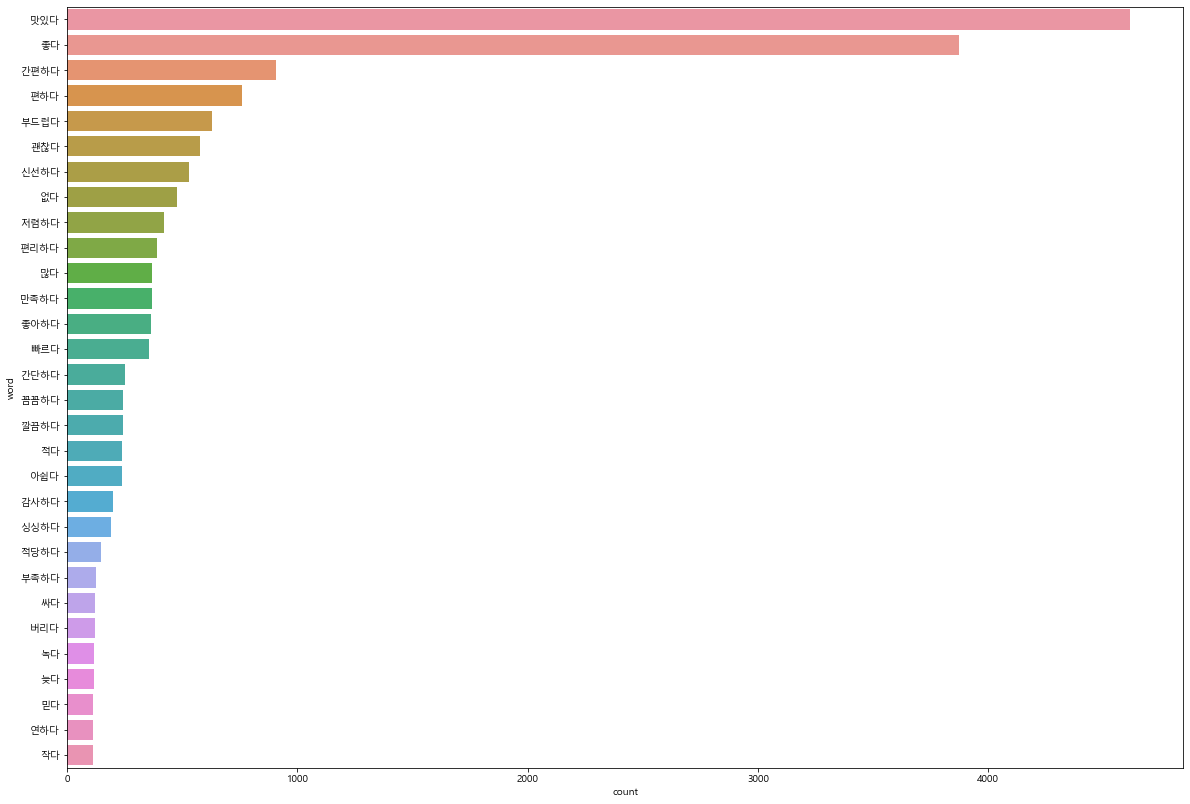

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,14))
sns.barplot(x='count', y='word', data=count_pos_df)

## 밀푀유나베 크롤링

In [2]:
driver = webdriver.Chrome('../../driver/chromedriver.exe')
driver.get('https://search.shopping.naver.com/catalog/19933378528?query=%ED%94%84%EB%A0%88%EC%8B%9C%EC%A7%80&NaPm=ct%3Dkj8afoww%7Cci%3D607911ab9197cb5d82ea5fa5af6dd8c401a08304%7Ctr%3Dslsl%7Csn%3D95694%7Chk%3Dfdea4e5b9a269d7331124fb0960dda1a75bbbd10')
time.sleep(2)

In [3]:
#쇼핑몰리뷰 클릭
driver.find_element_by_css_selector('#snb > ul > li:nth-child(2) > a').click()

In [4]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [5]:
#1~10페이지
result = []

for i in range(1,11):
    for j in range(20):
        content = soup.select('p.reviewItems_text__XIsTc')[j].text
        content = unicodedata.normalize('NFC', content)
        result.append(content)
        
    page = '#section_review > div.pagination_pagination__2M9a4 > a:nth-child('+ str(i) +')'
    next_page = driver.find_element_by_css_selector(page).click()
    time.sleep(1)

In [6]:
#11~30페이지까지
result2_raw = [] #크롤링 결과값 넣어줄 리스트 초기화
result2 = [] #결과값 텍스트로 변환해 넣어줄 리스트 초기화

for k in range(50): # 10단위로 페이지를 몇번 넘겨줄것인지
    for j in range(4,14): #페이지를 넘기기전에 11~20까지 한페이지씩 넘어가주는 for문
        for n in range(1,21): #리뷰가 한 페이지에 20개라 1부터 21미만까지 for문
            result2_raw = '#section_review > ul > li:nth-child('+str(n)+') > div.reviewItems_review__1eF8A > div > p'
            result2_raw = driver.find_element_by_css_selector(result2_raw)
            result2.append(result2_raw.text)
            
        if(j%13==0): 
            page = '#section_review > div.pagination_pagination__2M9a4 > a.pagination_next__3ycRH'
            
        else: 
            page = '#section_review > div.pagination_pagination__2M9a4 > a:nth-child('+str(j)+')'
            
        right = driver.find_element_by_css_selector(page)
        right.click()
        time.sleep(1)

In [7]:
print(len(result))
print(len(result2))

200
10000


In [8]:
result_df1 = pd.DataFrame(result)
result_df1.columns = ['content']
result_df2 = pd.DataFrame(result2)
result_df2.columns = ['content']

In [9]:
nabe_df = pd.concat([result_df1, result_df2])
nabe_df.drop_duplicates(subset='content', inplace=True)
nabe_df.reset_index(inplace=True, drop=True)
nabe_df.tail()

content
9976                                  항상 먹는곳입니다\n또시킬꺼예요
9977                                  맛있고 포장 꼼꼼하고 편리해요!
9978                                   먹기 편리하고 깔끔한 포장상태
9979                                   맛있어요~ 가족모두 좋아합니다
9980  공지사항에 내부검사가있어서 금요일에발송된다길래 그냥 빨리 시켰더니 내부검사가 일찍끝...

In [10]:
nabe_df.to_excel('../output/fresheasy/nabe_10000.xlsx', index=False)

In [60]:
import pandas as pd
nabe_df = pd.read_excel('../output/fresheasy/nabe_10000.xlsx', engine='openpyxl')
nabe_df

content
0     네이버 브랜드데이때 아주 저렴한 가격으로 구매했어요!평소 프레시지행사하면 자주 구매...
1     코로나 19로 외식하기 참 고민되시죠?저희 가족은 3월 내내 결혼기념일, 아들 생일...
2     야채가 종류별로 깨끗하고 신선하게 개별포장 되어 있어서 편리했고 깔끔하게 포장되어 ...
3     프레시지 항상 믿고 구매하고 있습니다. 밀푀유 나베는 해먹기만 했지 처음 주문해서 ...
4     코로나를 이겨볼 안심먹거리프레시지 쿠킹박스밀푀유나베 / 손쉬운전골요리쿠킹박스 간편조...
...                                                 ...
9976                                  항상 먹는곳입니다\n또시킬꺼예요
9977                                  맛있고 포장 꼼꼼하고 편리해요!
9978                                   먹기 편리하고 깔끔한 포장상태
9979                                   맛있어요~ 가족모두 좋아합니다
9980  공지사항에 내부검사가있어서 금요일에발송된다길래 그냥 빨리 시켰더니 내부검사가 일찍끝...

[9981 rows x 1 columns]

In [61]:
content_nabe = '%'.join(nabe_df['content'])
content_nabe

'네이버 브랜드데이때 아주 저렴한 가격으로 구매했어요!평소 프레시지행사하면 자주 구매하는편인데 외식을할 수 없는 요즘은 더욱 더 자주 찾게 되는것같아요.언제나 믿고 먹는 프레시지 밀키트! 아이스팩 꽁꽁 언상태로 신선하게 배송이왔구요.고기면 고기. 채소면 채소. 빛깔부터가 "나!신선! "이라고 써있는 느낌이랍니다.심지어 배추나, 깻잎 한장도 상태 나쁜 부분이 없는건그만큼 신선한 좋은재료를 쓴다는거고, 검수를 꼼꼼하게해서 보내주신다는거겠지요? 언제나 만족100% 신뢰감 200%로믿고 먹는 프레시지랍니다.얼마전 집들이에도 프레시지 메뉴들로 상을차렸는데 너무 맛있다는 칭찬세례를 받았답니다^^그래서 언제나 전 손님이오시면 항상 실패없는 프레시지랍니다.특히 부모님이 오실때에는 밀푀유나베를 자주 대접하는편인데요!아이부터 어른까지 두루두루 호불호가 갈리지 않는 메뉴가 바로 밀푀유나베 같아요~신선한 고기와 야채를  담백하고 깊은육수와 함께 보글보글 끓인 밀푀유나베는 남녀노소 진짜 누구나  좋아할 맛이에요! 소스도 취향껏 먹을 수 있도록 두가지나 들어있고, 한입 떠먹는순간 속 깊은곳까지 뜨끈하니온몸이 사르르 녹아내리는 맛이랍니다!어른들은 소주한잔 곁들이기 좋고,저희 5살 아이도 자극없는 깊은 국물에 부드러운 소고기, 야채까지도 잘먹어서 저희집 최애 메뉴지요^^비쥬얼은 어찌나 폼나는지.프레시지를 몰랐을때 밀푀유나베 한번 해보겠다고 어찌나 힘겹게 만들었었는지요ㅜ 재료비는 배보다 배꼽이 더컸었고요.그런데,프레시지면 장보러갈 필요도 없이 손질할 필요도 없이 신선한 고기.야채.육수.소스까지 한번에 집앞까지 갖다주니 정말  편리해요! 거기다 말도 안되는 가격 ! 말이 안되죠! 진짜 이걸하나씩 구매하려했음 가격이 얼마ㅜ인지? 거기에 포장은 어찌나 꼼꼼한지 하나하나 낱개 포장되어있어 깔끔하고!신선하고!진짜 최고에요.밀키트 미리 몇개 주문해서 쟁여놓으면 어찌나 마음이 든든한지 특히 코로나사태에 우리집에 삼식이들이 살거든요ㅜ 한끼한끼 메뉴걱정인 요즘 프레시지는 진짜 사랑이랍니다. 남은 육수에 밥

## Verb&Adjective 빈도수 확인

In [62]:
from konlpy.tag import Twitter
t = Twitter()

In [63]:
morph_nabe = []
for i in range(len(nabe_df)):
    morph = t.morphs(nabe_df['content'][i])
    morph_nabe.extend(morph)

In [64]:
pos_nabe = []
for i in range(len(nabe_df)):
    pos = t.pos(nabe_df['content'][i], norm=True, stem=True)
    pos_nabe.extend(pos)

In [70]:
for i in range(len(morph_nabe)):
    if len(morph_nabe[i]) == 1:
        del morph_nabe[i]

In [75]:
for i in range(len(pos_nabe)):
    if len(pos_nabe[i][0]) == 1:
        del pos_nabe[i]

In [76]:
pos_nabe_selected = []
for i in range(len(pos_nabe)):
    if pos_nabe[i][1] in ['Verb', 'Adjective']:
        pos_nabe_selected.append(pos_nabe[i][0])

In [77]:
len(pos_nabe_selected)

50125

In [78]:
from collections import Counter

count_pos = Counter(pos_nabe_selected)
count_pos.most_common(50)

[('먹다', 5349),
 ('하다', 5258),
 ('맛있다', 4579),
 ('좋다', 3702),
 ('있다', 1635),
 ('자다', 1091),
 ('간편하다', 946),
 ('시키다', 881),
 ('편하다', 872),
 ('같다', 860),
 ('이다', 794),
 ('오다', 625),
 ('신선하다', 617),
 ('넣다', 614),
 ('되어다', 580),
 ('되다', 551),
 ('보다', 548),
 ('재다', 516),
 ('편리하다', 501),
 ('괜찮다', 487),
 ('않다', 481),
 ('만들다', 454),
 ('들다', 450),
 ('넘다', 419),
 ('빠르다', 383),
 ('깔끔하다', 376),
 ('만족하다', 362),
 ('많다', 359),
 ('없다', 348),
 ('좋아하다', 301),
 ('쉬다', 300),
 ('나다', 295),
 ('받다', 293),
 ('적다', 293),
 ('꼼꼼하다', 292),
 ('잇다', 292),
 ('싱싱하다', 285),
 ('아쉽다', 263),
 ('간단하다', 262),
 ('저렴하다', 235),
 ('끓이다', 227),
 ('사다', 224),
 ('부족하다', 183),
 ('사먹다', 181),
 ('가다', 180),
 ('감사하다', 168),
 ('그렇다', 168),
 ('짜다', 164),
 ('싶다', 157),
 ('아니다', 150)]

In [79]:
STOPWORDS = ['먹다', '하다', '자다', '이다', '아니다', '가다', '사먹다', '싶다', '잇다', '나다', '받다', '들다',
            '않다', '넘다', '오다', '있다', '넣다', '같다', '되어다', '되다', '보다', '재다', '만들다', '없다',
            '사다', '끓이다', '나오다', '빼다', '알다', '베다', '해주다', '푸다', '늘다', '찍다', '지다', '보내다',
            '걸리다', '돼다', '주다', '해봤다', '드리다', '파다', '말다', '써다', '서다', '얼다']
count_pos_selected = [each_word for each_word in pos_nabe_selected if each_word not in STOPWORDS]

In [80]:
num = [index for index, value in enumerate(count_pos_selected) if value == '빨르다']

In [ ]:
len(num)

In [81]:
count_pos_selected[num[0]].replace(count_pos_selected[num[0]], '빠르다')

'빠르다'

In [82]:
for i in range(61):
    count_pos_selected[num[i]] = count_pos_selected[num[i]].replace(count_pos_selected[num[i]], '빠르다')

In [83]:
count_pos2 = Counter(count_pos_selected)
count_pos2.most_common(50)

[('맛있다', 4579),
 ('좋다', 3702),
 ('간편하다', 946),
 ('시키다', 881),
 ('편하다', 872),
 ('신선하다', 617),
 ('편리하다', 501),
 ('괜찮다', 487),
 ('빠르다', 444),
 ('깔끔하다', 376),
 ('만족하다', 362),
 ('많다', 359),
 ('좋아하다', 301),
 ('쉬다', 300),
 ('적다', 293),
 ('꼼꼼하다', 292),
 ('싱싱하다', 285),
 ('아쉽다', 263),
 ('간단하다', 262),
 ('저렴하다', 235),
 ('부족하다', 183),
 ('감사하다', 168),
 ('그렇다', 168),
 ('짜다', 164),
 ('작다', 146),
 ('적당하다', 139),
 ('버리다', 137),
 ('남다', 134),
 ('늦다', 130),
 ('넉넉하다', 119),
 ('믿다', 109),
 ('해보다', 95),
 ('맞다', 94),
 ('차다', 91),
 ('배부르다', 89),
 ('딱이다', 87),
 ('크다', 86),
 ('예쁘다', 86),
 ('싸다', 80),
 ('쉽다', 80),
 ('어렵다', 73),
 ('느리다', 72),
 ('안좋다', 71),
 ('생각나다', 70),
 ('만족스럽다', 68),
 ('이쁘다', 67),
 ('안되다', 63),
 ('귀찮다', 61),
 ('충분하다', 60),
 ('모르다', 55)]

In [84]:
count_pos_df = pd.DataFrame(count_pos2.most_common(30))
count_pos_df.columns = ['word', 'count']

In [86]:
count_pos_df.to_excel('../../data/fresheasy/fresheasy_count_pos_nabe.xlsx', index=False)

<AxesSubplot:xlabel='count', ylabel='word'>

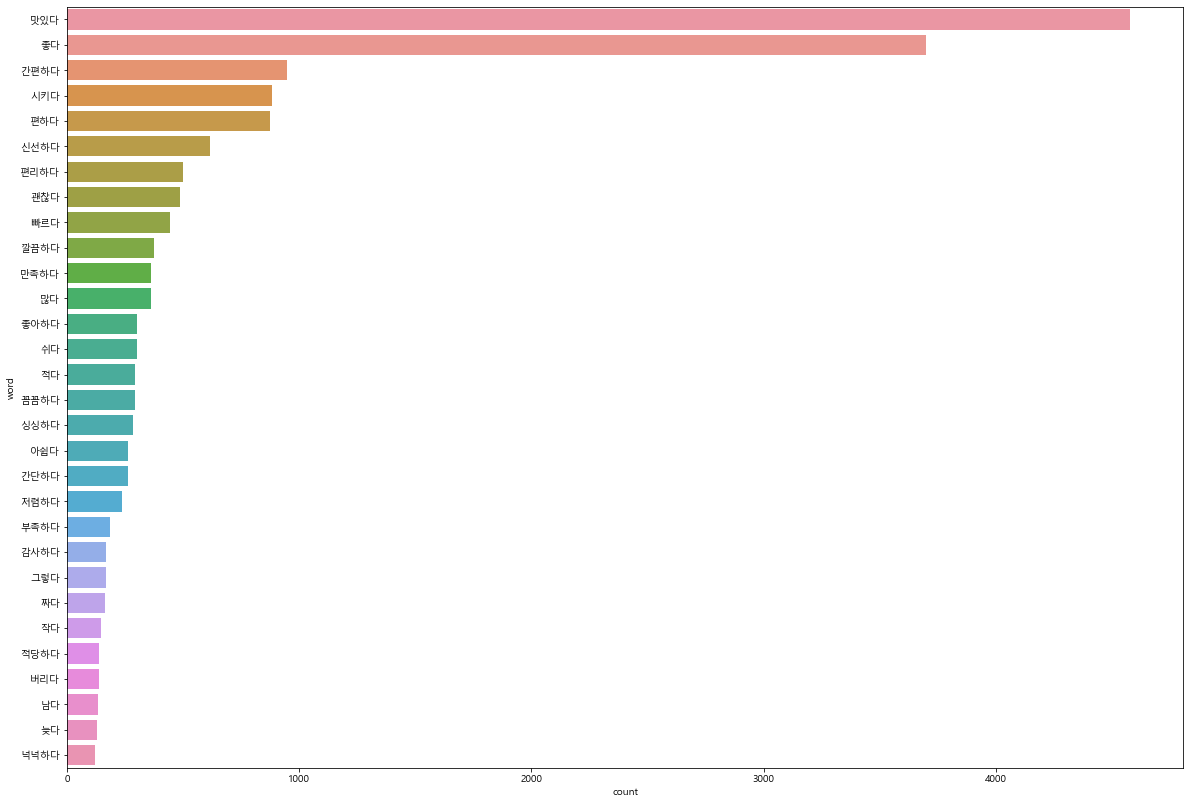

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,14))
sns.barplot(x='count', y='word', data=count_pos_df)

## 통합 Verb&Adjective 빈도수

In [92]:
steak_df = pd.read_excel('../output/fresheasy/steak_10000.xlsx', engine='openpyxl')
nabe_df = pd.read_excel('../output/fresheasy/nabe_10000.xlsx', engine='openpyxl')

In [93]:
df = pd.concat([steak_df, nabe_df])
df.reset_index(inplace=True, drop=True)
df.tail()

content
19938                                  항상 먹는곳입니다\n또시킬꺼예요
19939                                  맛있고 포장 꼼꼼하고 편리해요!
19940                                   먹기 편리하고 깔끔한 포장상태
19941                                   맛있어요~ 가족모두 좋아합니다
19942  공지사항에 내부검사가있어서 금요일에발송된다길래 그냥 빨리 시켰더니 내부검사가 일찍끝...

In [94]:
df.drop_duplicates(subset='content', inplace=True)
df.reset_index(inplace=True, drop=True)
df.tail()

content
19862                                  항상 먹는곳입니다\n또시킬꺼예요
19863                                  맛있고 포장 꼼꼼하고 편리해요!
19864                                   먹기 편리하고 깔끔한 포장상태
19865                                   맛있어요~ 가족모두 좋아합니다
19866  공지사항에 내부검사가있어서 금요일에발송된다길래 그냥 빨리 시켰더니 내부검사가 일찍끝...

In [129]:
df.to_excel('../output/fresheasy/fresheasy_shopping_all.xlsx', index=False)

In [96]:
content= '%'.join(df['content'])
content

'휴일마무리로 프레시지 어떠세요?? 긴 황금연휴끝내고 어린이날 저녁준비하려니 왤케 싫은거죠?? ㅋㅋ 그럴때 프레시지만한게 없어요ㅠ 진짜 금방 뚝딱뚝딱! 짠! 완성!!!블랙라벨스테이크와 소고기샤브샤브로 휴일마무리 잘했어요~ 블랙라벨은 남편이 먹을때마다 고기맛있다며 극찬해요! 진짜 그가격맞냐고 놀라워하고요!! 증말가성비갑이에요♥♥ 마리네이드를 위한 오일과 허브솔트까지 있는걸보곤 세심하다 생각했어요ㅋㅋ 소고기샤브샤브는 매번 집에서 해먹으면 남은야채보관이 번거롭더라구요ㅠ 숙주도 양배추도 반절남아버리니 보관도 따로해야하고 소진할 다른음식도 해야하고ㅠ 근데 프레시지는 딱 해먹고 끝!!!!주부라서 먹을만큼만사서 잔반없이 다먹으면 을매나 행복하다구요ㅠ근데 매콤맛 개발해주심 안되나요??ㅋ 매콤 밀푀유나베 먹어보니 맛있었는데 밀푀유는 깻잎+배추 포개서 싸야되니 소고기샤브샤브로만 손이가네요~;;소고기샤브샤브 다먹고 칼국수사리넣어 겉절이랑 무생채까지 곁들이니 이게 휴일마지막 마무리지 싶더라구요~^^♥아직도 프레시지 안드셔보셨어요? 믿고 구매하세요! 분명 재구매하게될거에요ㅋㅋㅋ 훗!마지막으로 프레시지 시킬때마다 검정플라스틱 그릇은 버리지마세요!!엄마표놀이할때 최고에요ㅎ 베이킹소다부어놓고 물감뿌리기/드라이아이스 택배온걸로 과학놀이하기ㅎㅎ 아이랑 재밌는 시간보낼 수 있는 넓은 그릇이니 다양하게 활용해보세요~^^%네이버 브랜드데이때 저렴한가격으로 구매했어요!평소 프레시지 밀키트를 좋아해서 행사하면 자주 구매하는편인데 외식을 할 수 없는 요즘은 더욱 더 자주 구매하게 되는것같아요! 특히나, 식당이나 레스토랑에서  스테이크를 먹는 외식은  더욱 할 수 없는 시기이니만큼  블랙라벨스테이크를 자주 구매해서 먹고있습니다.언제나 100% 만족스러운 블랙라벨스테이크!이 가격에 이런 품질 스테이크라니! 매번 먹으면서 감탄하게되는 믿기지 않는 품질과 맛!그리고 저렴한가격까지! 맛있다 연발하는 신랑은 가격을 몇번이나 되묻고 놀래더라고요ㅎ배송은 평소보다 조금 느린편이었지만 아이스팩이 꽁꽁 얼어있는상태로 신선

In [97]:
pos_list = []
for i in range(len(df)):
    pos = t.pos(df['content'][i], norm=True, stem=True)
    pos_list.extend(pos)

In [130]:
len(pos_list)

221890

In [131]:
for i in range(len(pos_list)):
    if len(pos_list[i][0]) == 1:
        del pos_list[i]

In [132]:
len(pos_list)

221890

In [133]:
pos_selected = []
for i in range(len(pos_list)):
    if pos_list[i][1] in ['Verb', 'Adjective']:
        pos_selected.append(pos_list[i][0])

In [134]:
len(pos_selected)

102506

In [135]:
from collections import Counter

count_pos = Counter(pos_selected)
count_pos.most_common(50)

[('하다', 11123),
 ('먹다', 10326),
 ('맛있다', 9160),
 ('좋다', 7554),
 ('있다', 3687),
 ('자다', 2319),
 ('간편하다', 1840),
 ('이다', 1795),
 ('같다', 1737),
 ('편하다', 1625),
 ('시키다', 1517),
 ('되다', 1254),
 ('되어다', 1221),
 ('재다', 1163),
 ('보다', 1147),
 ('신선하다', 1142),
 ('않다', 1128),
 ('오다', 1103),
 ('괜찮다', 1063),
 ('들다', 1040),
 ('넘다', 905),
 ('편리하다', 886),
 ('없다', 823),
 ('넣다', 818),
 ('빠르다', 733),
 ('만족하다', 729),
 ('많다', 725),
 ('만들다', 704),
 ('받다', 692),
 ('나다', 692),
 ('좋아하다', 665),
 ('부드럽다', 665),
 ('저렴하다', 650),
 ('깔끔하다', 616),
 ('쉬다', 573),
 ('꼼꼼하다', 533),
 ('적다', 531),
 ('간단하다', 513),
 ('사다', 508),
 ('잇다', 501),
 ('아쉽다', 498),
 ('굽다', 479),
 ('싱싱하다', 475),
 ('아니다', 419),
 ('그렇다', 397),
 ('사먹다', 386),
 ('가다', 369),
 ('감사하다', 364),
 ('싶다', 327),
 ('부족하다', 309)]

In [136]:
STOPWORDS = ['먹다', '하다', '자다', '이다', '아니다', '가다', '사먹다', '싶다', '잇다', '나다', '받다', '들다',
            '않다', '넘다', '오다', '있다', '넣다', '같다', '되어다', '되다', '보다', '재다', '만들다', '없다',
            '사다', '끓이다', '나오다', '빼다', '알다', '베다', '해주다', '푸다', '늘다', '찍다', '지다', '보내다',
            '걸리다', '돼다', '주다', '해봤다', '드리다', '파다', '말다', '써다', '서다', '얼다', '쉬다']

count_pos_selected = [each_word for each_word in pos_nabe_selected if each_word not in STOPWORDS]

In [137]:
count_pos2 = Counter(count_pos_selected)
count_pos2.most_common(50)

[('먹다', 5349),
 ('하다', 5258),
 ('맛있다', 4579),
 ('좋다', 3702),
 ('있다', 1635),
 ('자다', 1091),
 ('간편하다', 946),
 ('시키다', 881),
 ('편하다', 872),
 ('같다', 860),
 ('이다', 794),
 ('오다', 625),
 ('신선하다', 617),
 ('넣다', 614),
 ('되어다', 580),
 ('되다', 551),
 ('보다', 548),
 ('재다', 516),
 ('편리하다', 501),
 ('괜찮다', 487),
 ('않다', 481),
 ('만들다', 454),
 ('들다', 450),
 ('넘다', 419),
 ('빠르다', 383),
 ('깔끔하다', 376),
 ('만족하다', 362),
 ('많다', 359),
 ('없다', 348),
 ('좋아하다', 301),
 ('쉬다', 300),
 ('나다', 295),
 ('받다', 293),
 ('적다', 293),
 ('꼼꼼하다', 292),
 ('잇다', 292),
 ('싱싱하다', 285),
 ('아쉽다', 263),
 ('간단하다', 262),
 ('저렴하다', 235),
 ('끓이다', 227),
 ('사다', 224),
 ('부족하다', 183),
 ('사먹다', 181),
 ('가다', 180),
 ('감사하다', 168),
 ('그렇다', 168),
 ('짜다', 164),
 ('싶다', 157),
 ('아니다', 150)]

In [124]:
num = [index for index, value in enumerate(count_pos_selected) if value == '빨르다']

In [125]:
for i in range(61):
    count_pos_selected[num[i]] = count_pos_selected[num[i]].replace(count_pos_selected[num[i]], '빠르다')

In [126]:
count_pos2 = Counter(count_pos_selected)
count_pos2.most_common(50)

[('맛있다', 4564),
 ('좋다', 3690),
 ('간편하다', 944),
 ('시키다', 879),
 ('편하다', 871),
 ('신선하다', 617),
 ('빠르다', 504),
 ('편리하다', 500),
 ('괜찮다', 486),
 ('깔끔하다', 376),
 ('만족하다', 361),
 ('많다', 359),
 ('좋아하다', 298),
 ('꼼꼼하다', 292),
 ('적다', 292),
 ('싱싱하다', 285),
 ('아쉽다', 263),
 ('간단하다', 262),
 ('저렴하다', 235),
 ('부족하다', 183),
 ('감사하다', 168),
 ('그렇다', 168),
 ('짜다', 164),
 ('작다', 146),
 ('적당하다', 139),
 ('버리다', 136),
 ('남다', 134),
 ('늦다', 130),
 ('넉넉하다', 119),
 ('믿다', 109),
 ('해보다', 95),
 ('맞다', 94),
 ('차다', 91),
 ('배부르다', 89),
 ('딱이다', 87),
 ('크다', 86),
 ('예쁘다', 86),
 ('싸다', 80),
 ('쉽다', 79),
 ('어렵다', 73),
 ('느리다', 72),
 ('안좋다', 71),
 ('생각나다', 69),
 ('만족스럽다', 68),
 ('이쁘다', 66),
 ('안되다', 63),
 ('귀찮다', 61),
 ('충분하다', 60),
 ('모르다', 55),
 ('살다', 54)]

In [127]:
count_pos_df = pd.DataFrame(count_pos2.most_common(30))
count_pos_df.columns = ['word', 'count']

In [128]:
count_pos_df.to_excel('../output/fresheasy/fresheasy_pos_all.xlsx', index=False)